# Tianyi Zhang 9598110243

------------

## 1. The LASSO and Boosting for Regression

### a)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [2]:
import sys
import warnings

warnings.filterwarnings('ignore')
if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [3]:
data_folder = '..\\data'
column_labels = ["state","county","community","communityname","fold","population","householdsize","racepctblack","racePctWhite","racePctAsian","racePctHisp","agePct12t21","agePct12t29","agePct16t24","agePct65up","numbUrban","pctUrban","medIncome","pctWWage","pctWFarmSelf","pctWInvInc","pctWSocSec","pctWPubAsst","pctWRetire","medFamInc","perCapInc","whitePerCap","blackPerCap","indianPerCap","AsianPerCap","OtherPerCap","HispPerCap","NumUnderPov","PctPopUnderPov","PctLess9thGrade","PctNotHSGrad","PctBSorMore","PctUnemployed","PctEmploy","PctEmplManu","PctEmplProfServ","PctOccupManu","PctOccupMgmtProf","MalePctDivorce","MalePctNevMarr","FemalePctDiv","TotalPctDiv","PersPerFam","PctFam2Par","PctKids2Par","PctYoungKids2Par","PctTeen2Par","PctWorkMomYoungKids","PctWorkMom","NumIlleg","PctIlleg","NumImmig","PctImmigRecent","PctImmigRec5","PctImmigRec8","PctImmigRec10","PctRecentImmig","PctRecImmig5","PctRecImmig8","PctRecImmig10","PctSpeakEnglOnly","PctNotSpeakEnglWell","PctLargHouseFam","PctLargHouseOccup","PersPerOccupHous","PersPerOwnOccHous","PersPerRentOccHous","PctPersOwnOccup","PctPersDenseHous","PctHousLess3BR","MedNumBR","HousVacant","PctHousOccup","PctHousOwnOcc","PctVacantBoarded","PctVacMore6Mos","MedYrHousBuilt","PctHousNoPhone","PctWOFullPlumb","OwnOccLowQuart","OwnOccMedVal","OwnOccHiQuart","RentLowQ","RentMedian","RentHighQ","MedRent","MedRentPctHousInc","MedOwnCostPctInc","MedOwnCostPctIncNoMtg","NumInShelters","NumStreet","PctForeignBorn","PctBornSameState","PctSameHouse85","PctSameCity85","PctSameState85","LemasSwornFT","LemasSwFTPerPop","LemasSwFTFieldOps","LemasSwFTFieldPerPop","LemasTotalReq","LemasTotReqPerPop","PolicReqPerOffic","PolicPerPop","RacialMatchCommPol","PctPolicWhite","PctPolicBlack","PctPolicHisp","PctPolicAsian","PctPolicMinor","OfficAssgnDrugUnits","NumKindsDrugsSeiz","PolicAveOTWorked","LandArea","PopDens","PctUsePubTrans","PolicCars","PolicOperBudg","LemasPctPolicOnPatr","LemasGangUnitDeploy","LemasPctOfficDrugUn","PolicBudgPerPop","ViolentCrimesPerPop"]

In [4]:
filename = os.path.join(data_folder,'communities.csv')

df = pd.read_csv(filename, header = None)
df.columns = column_labels

print(df.head(5))

   state county community        communityname  fold  population  \
0      8      ?         ?         Lakewoodcity     1        0.19   
1     53      ?         ?          Tukwilacity     1        0.00   
2     24      ?         ?         Aberdeentown     1        0.00   
3     34      5     81440  Willingborotownship     1        0.04   
4     42     95      6096    Bethlehemtownship     1        0.01   

   householdsize  racepctblack  racePctWhite  racePctAsian  ...  LandArea  \
0           0.33          0.02          0.90          0.12  ...      0.12   
1           0.16          0.12          0.74          0.45  ...      0.02   
2           0.42          0.49          0.56          0.17  ...      0.01   
3           0.77          1.00          0.08          0.12  ...      0.02   
4           0.55          0.02          0.95          0.09  ...      0.04   

   PopDens  PctUsePubTrans  PolicCars  PolicOperBudg  LemasPctPolicOnPatr  \
0     0.26            0.20       0.06           0.0

In [5]:
xtr = df.iloc[:1495, :-1]
ytr = df.iloc[:1495, -1]
xte = df.iloc[1495:, :-1]
yte = df.iloc[1495:, -1]

print("traning data and label shape:", xtr.shape, ytr.shape)
print("test data and label shape:", xte.shape, yte.shape)

traning data and label shape: (1495, 127) (1495,)
test data and label shape: (499, 127) (499,)


### b)

In [6]:
from sklearn.impute import SimpleImputer

In [7]:
not_predictive = ["state", "county", "community", "communityname", "fold"]
remain = list(set(column_labels) - set(not_predictive))
remain.sort(key = column_labels.index)
print("original shape:",df.shape)
data = df[remain]
print("after removing all not_predictive columns:",data.shape)
print("-----------------------")
print(data.head(5))

original shape: (1994, 128)
after removing all not_predictive columns: (1994, 123)
-----------------------
   population  householdsize  racepctblack  racePctWhite  racePctAsian  \
0        0.19           0.33          0.02          0.90          0.12   
1        0.00           0.16          0.12          0.74          0.45   
2        0.00           0.42          0.49          0.56          0.17   
3        0.04           0.77          1.00          0.08          0.12   
4        0.01           0.55          0.02          0.95          0.09   

   racePctHisp  agePct12t21  agePct12t29  agePct16t24  agePct65up  ...  \
0         0.17         0.34         0.47         0.29        0.32  ...   
1         0.07         0.26         0.59         0.35        0.27  ...   
2         0.04         0.39         0.47         0.28        0.32  ...   
3         0.10         0.51         0.50         0.34        0.21  ...   
4         0.05         0.38         0.38         0.23        0.36  ...   

   

In [8]:
x = data.iloc[:, :-1].replace('?', np.nan)
y = data.iloc[:, -1]
ylabel = df.columns[-1]
print("data shape:", x.shape)
print("label shape:", y.shape)
print(ylabel)

data shape: (1994, 122)
label shape: (1994,)
ViolentCrimesPerPop


In [9]:
missing_columns = x.columns[x.isnull().any()]
print("before imputation: {} columns miss values".format(missing_columns.shape[0]))
print(x[missing_columns].describe())

before imputation: 23 columns miss values
       OtherPerCap LemasSwornFT LemasSwFTPerPop LemasSwFTFieldOps  \
count         1993          319             319               319   
unique          97           38              52                34   
top              0         0.02             0.2              0.98   
freq           129           80              19                81   

       LemasSwFTFieldPerPop LemasTotalReq LemasTotReqPerPop PolicReqPerOffic  \
count                   319           319               319              319   
unique                   55            44                59               75   
top                    0.14          0.02              0.14             0.23   
freq                     17            55                23               15   

       PolicPerPop RacialMatchCommPol  ... PctPolicAsian PctPolicMinor  \
count          319                319  ...           319           319   
unique          52                 76  ...            50       

**we can find just OtherPerCap includes enough data. other features lost too much, so I will drop them directly.**

In [10]:
impute_mean = SimpleImputer(missing_values = np.nan, strategy = 'mean')
impute_mean.fit(x[['OtherPerCap']])
x[['OtherPerCap']] = impute_mean.transform(x[['OtherPerCap']])

missing_columns = x.columns[x.isnull().any()]
print("after imputation: {} columns miss values".format(missing_columns.shape[0]))

x = x.dropna(axis=1)
print("data shape we will use:", x.shape)

after imputation: 22 columns miss values
data shape we will use: (1994, 100)


In [11]:
remain_labels = x.columns.tolist()
print(remain_labels)

['population', 'householdsize', 'racepctblack', 'racePctWhite', 'racePctAsian', 'racePctHisp', 'agePct12t21', 'agePct12t29', 'agePct16t24', 'agePct65up', 'numbUrban', 'pctUrban', 'medIncome', 'pctWWage', 'pctWFarmSelf', 'pctWInvInc', 'pctWSocSec', 'pctWPubAsst', 'pctWRetire', 'medFamInc', 'perCapInc', 'whitePerCap', 'blackPerCap', 'indianPerCap', 'AsianPerCap', 'OtherPerCap', 'HispPerCap', 'NumUnderPov', 'PctPopUnderPov', 'PctLess9thGrade', 'PctNotHSGrad', 'PctBSorMore', 'PctUnemployed', 'PctEmploy', 'PctEmplManu', 'PctEmplProfServ', 'PctOccupManu', 'PctOccupMgmtProf', 'MalePctDivorce', 'MalePctNevMarr', 'FemalePctDiv', 'TotalPctDiv', 'PersPerFam', 'PctFam2Par', 'PctKids2Par', 'PctYoungKids2Par', 'PctTeen2Par', 'PctWorkMomYoungKids', 'PctWorkMom', 'NumIlleg', 'PctIlleg', 'NumImmig', 'PctImmigRecent', 'PctImmigRec5', 'PctImmigRec8', 'PctImmigRec10', 'PctRecentImmig', 'PctRecImmig5', 'PctRecImmig8', 'PctRecImmig10', 'PctSpeakEnglOnly', 'PctNotSpeakEnglWell', 'PctLargHouseFam', 'PctLargHo

In [12]:
print(x.head(5))

   population  householdsize  racepctblack  racePctWhite  racePctAsian  \
0        0.19           0.33          0.02          0.90          0.12   
1        0.00           0.16          0.12          0.74          0.45   
2        0.00           0.42          0.49          0.56          0.17   
3        0.04           0.77          1.00          0.08          0.12   
4        0.01           0.55          0.02          0.95          0.09   

   racePctHisp  agePct12t21  agePct12t29  agePct16t24  agePct65up  ...  \
0         0.17         0.34         0.47         0.29        0.32  ...   
1         0.07         0.26         0.59         0.35        0.27  ...   
2         0.04         0.39         0.47         0.28        0.32  ...   
3         0.10         0.51         0.50         0.34        0.21  ...   
4         0.05         0.38         0.38         0.23        0.36  ...   

   NumStreet  PctForeignBorn  PctBornSameState  PctSameHouse85  PctSameCity85  \
0        0.0            0.12 

In [13]:
xtr = x.iloc[:1495, :]
ytr = y.iloc[:1495]
xte = x.iloc[1495:, :]
yte = y.iloc[1495:]

print("traning data and label shape:", xtr.shape, ytr.shape)
print("test data and label shape:", xte.shape, yte.shape)

traning data and label shape: (1495, 100) (1495,)
test data and label shape: (499, 100) (499,)


### c)

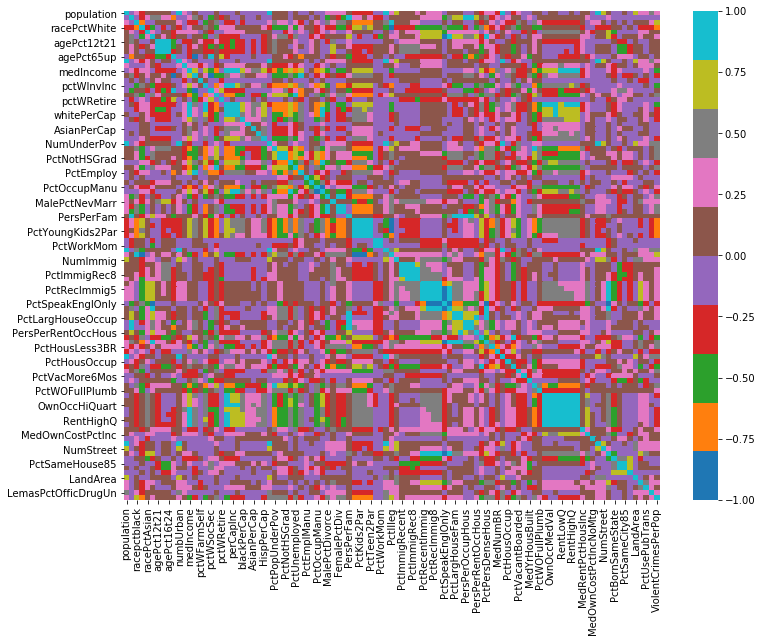

In [14]:
fulldata = pd.concat([x, y], axis=1)
correlation = fulldata.corr()
fig = plt.figure(figsize=(12, 9))
sns.heatmap(correlation, vmin=-1, vmax=1, cmap=sns.color_palette())
plt.show()

### d)

In [15]:
cv_function = lambda x: np.std(x) / np.mean(x)
cv = np.apply_along_axis(cv_function, axis=0, arr=fulldata.to_numpy())
print("The CV for each feature are: \n", cv)
# print(cv.shape)

The CV for each feature are: 
 [2.20294993 0.3532097  1.41056656 0.32370036 1.35882134 1.61387296
 0.36574812 0.29061999 0.49503634 0.42333552 2.00124163 0.63868866
 0.579608   0.32762787 0.69985456 0.35914986 0.36842021 0.6988552
 0.3495514  0.52759954 0.54549659 0.5074249  0.58932117 0.80948203
 0.60604183 0.67047639 0.47384086 2.30439167 0.75379109 0.67543079
 0.52815378 0.57825579 0.55599333 0.34724014 0.5104523  0.39812581
 0.5083338  0.422      0.39548416 0.40371035 0.3591826  0.371375
 0.31687526 0.33052823 0.3323925  0.32934323 0.32846855 0.33616412
 0.33263868 2.99344555 0.91957222 2.89976977 0.6840295  0.58474358
 0.50478324 0.45555177 1.29977426 1.29730638 1.28091166 1.28371176
 0.28860078 1.45870069 0.73435052 0.75691886 0.36682182 0.31932719
 0.46833631 0.3502283  1.1269169  0.34828327 0.81068443 1.9582885
 0.26957935 0.33745632 1.0644754  0.43600961 0.47029345 0.91798069
 0.84853101 0.84766758 0.87852946 0.8745136  0.63302762 0.56174345
 0.58686703 0.55545314 0.34574279 0

### e)

In [16]:
from math import sqrt, floor

In [17]:
print(floor(sqrt(128)))

11


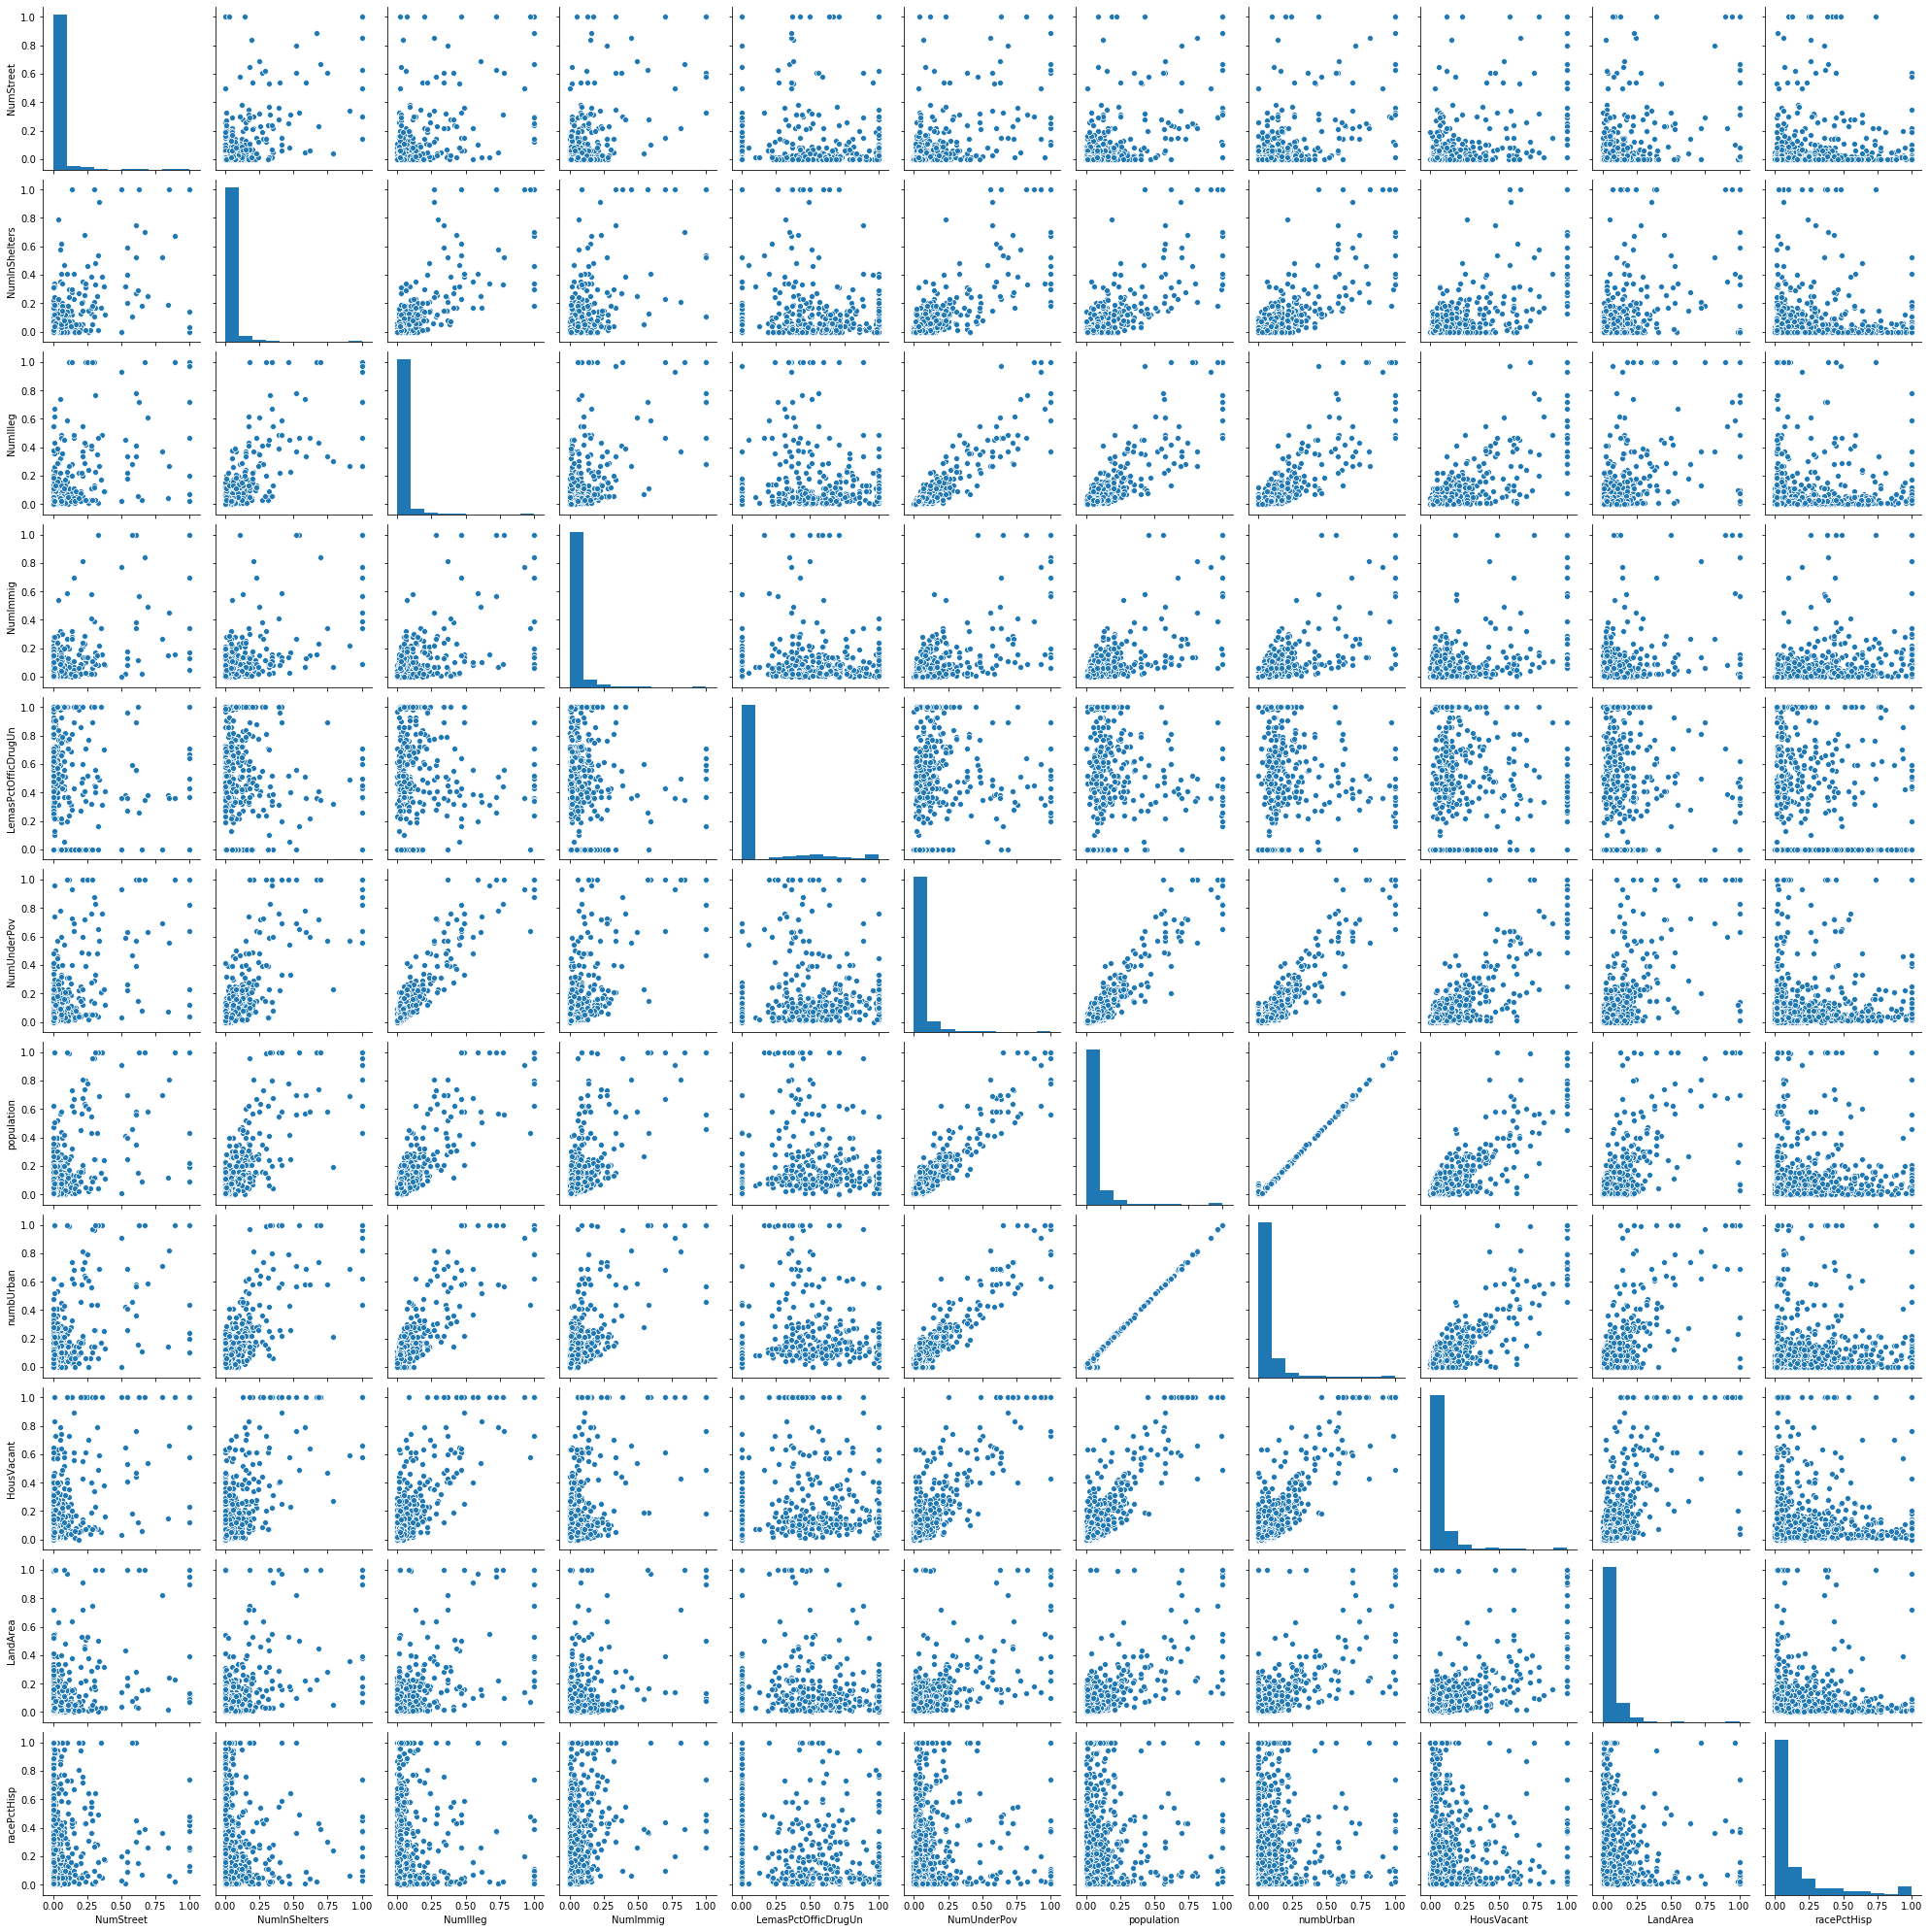

In [18]:
index = np.argsort(-cv)[:floor(sqrt(128))]
features_highCV = np.array(remain_labels)[index]
data_highCV = x[features_highCV]

sns.pairplot(data_highCV)
plt.show()

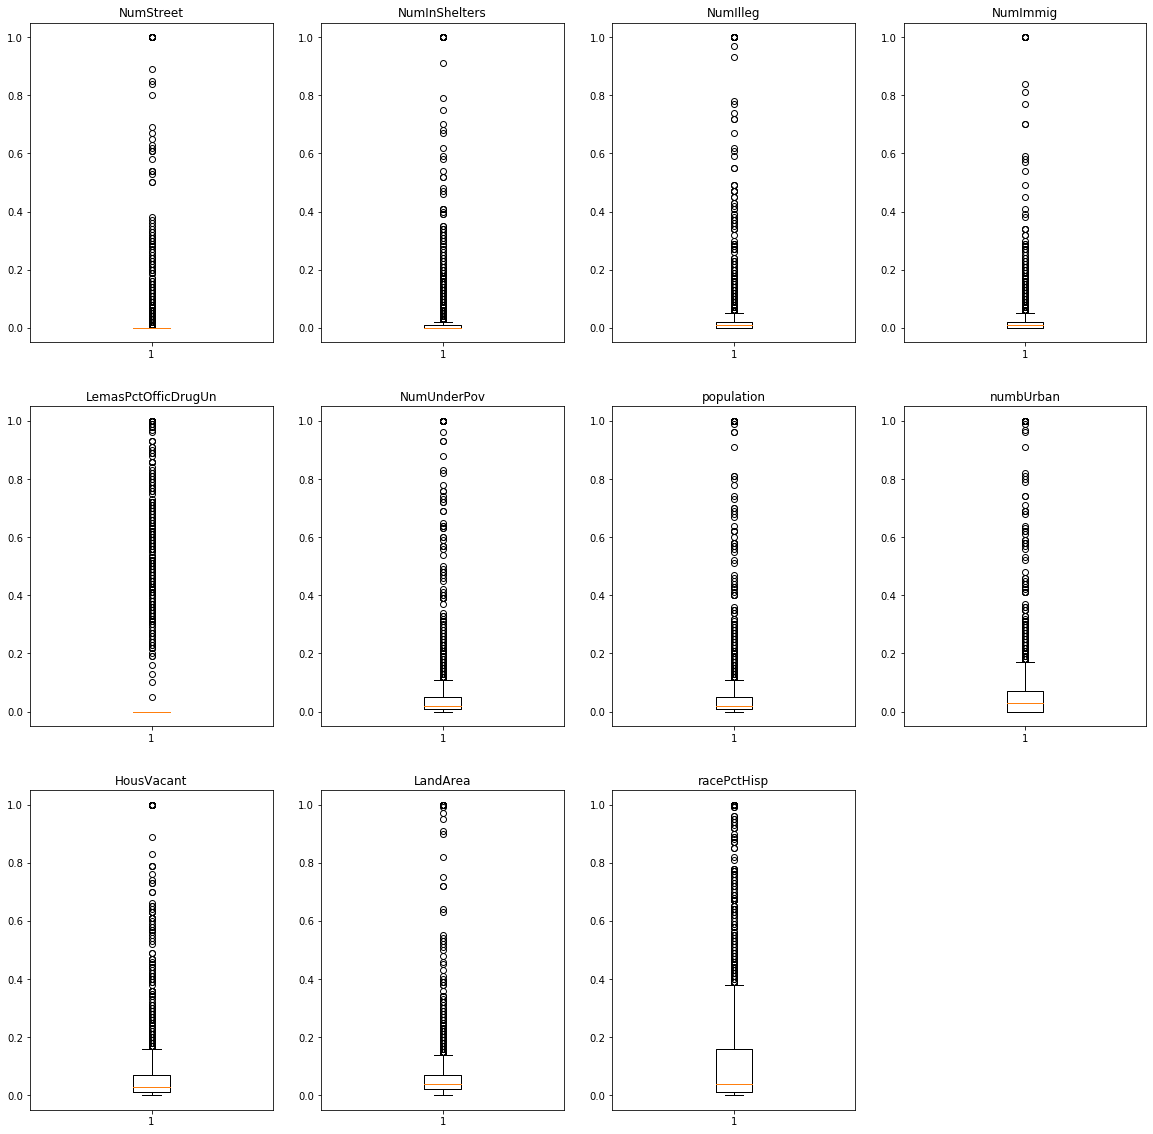

In [19]:
fig, ax = plt.subplots(nrows=3, ncols=4, figsize=(20, 20))

index = 0
for i in range(3):
    for j in range(4):
        if index < 11:
            ax[i, j].boxplot(data_highCV.loc[:, features_highCV[index]])
            ax[i, j].title.set_text(features_highCV[index])
            index = index + 1
        
ax[2, 3].remove()
plt.show()

### f)

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [21]:
linearReg = LinearRegression().fit(xtr, ytr)
prediction = linearReg.predict(xte)

print("test error:", mean_squared_error(yte, prediction))
print("Score : ", linearReg.score(xte, yte))

test error: 0.01784464470615782
Score :  0.6247601321388443


### g)

In [22]:
from sklearn.linear_model import RidgeCV

In [23]:
ridgeReg = RidgeCV(cv=10).fit(xtr, ytr)
prediction = ridgeReg.predict(xte)

print("test error:", mean_squared_error(yte, prediction))
print("Score : ", ridgeReg.score(xte, yte))

test error: 0.01750230693109155
Score :  0.6319588622674089


### h)

In [24]:
from sklearn.linear_model import LassoCV

In [25]:
lassoReg = LassoCV(cv = 10).fit(xtr, ytr)
prediction = lassoReg.predict(xte)

print("Before standardizing:")
print("---------------")
print("test error:", mean_squared_error(yte, prediction))
print("Score : ", lassoReg.score(xte, yte))

Before standardizing:
---------------
test error: 0.017590328398642788
Score :  0.6301079336332583


In [26]:
from sklearn.preprocessing import StandardScaler

In [27]:
scaler = StandardScaler().fit(x)
std_x = scaler.transform(x)

std_xtr = std_x[:1495]
std_xte = std_x[1495:]

In [28]:
lassoReg_std = LassoCV(cv = 10).fit(std_xtr, ytr)
prediction = lassoReg_std.predict(std_xte)

print("For standardized features:")
print("---------------")
print("standardized features, test error:", mean_squared_error(yte, prediction))
print("standardized features, Score : ", lassoReg_std.score(std_xte, yte))

For standardized features:
---------------
standardized features, test error: 0.017603827638223594
standardized features, Score :  0.6298240695967399


**from my result, we can find there is no much difference between two models. Maybe it's a little better not to standardize the data.**

### i)

In [29]:
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score

In [30]:
num_components = x.shape[1]

linearR = LinearRegression()
mse = list()
for m in range(1, num_components):
    pca = PCA(n_components = m)
    xtr_reg = pca.fit_transform(std_xtr)
    mse.append(-1 * cross_val_score(linearR, xtr_reg, ytr, cv=10,
                                    scoring='neg_mean_squared_error').mean())
bestM = np.argmin(mse)
print("the best M:", bestM)

the best M: 77


In [31]:
pca = PCA(n_components = bestM)
xtr_reg = pca.fit_transform(std_xtr)
xte_reg = pca.fit_transform(std_xte)
pcrReg = LinearRegression().fit(xtr_reg, ytr)
prediction = pcrReg.predict(xte_reg)
print("test error: ", mean_squared_error(yte, prediction))
print("Score : ", pcrReg.score(xte_reg, yte))

test error:  0.02854258367812226
Score :  0.39980226537664465


### j)

In [32]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

In [33]:
alpha = {'alpha':[1e-5, 1e-4, 1e-3, 0.01, 0.1, 1, 10]}
dtr = xgb.DMatrix(xtr, label=ytr)
dte = xgb.DMatrix(xte, label=yte)
xgbClf = xgb.XGBRegressor(n_estimators=100, max_depth=4, eta = 0.1, objective="reg:squarederror")

gridCV = GridSearchCV(estimator=xgbClf, param_grid=alpha, cv=10, n_jobs=-1)
gridCV.fit(xtr, ytr)
print("best alpha:", gridCV.best_params_)

best alpha: {'alpha': 0.1}


## 2. Tree-Based Methods

### a)

### b)

In [34]:
filename2 = os.path.join(data_folder,'aps_failure_training_set.csv')
df2 = pd.read_csv(filename2, skiprows = 20, header = 0).replace('na', np.nan)

print(df2.head(5))

missing_columns = df2.columns[df2.isnull().any()]
print(df2[missing_columns].describe())

  class  aa_000 ab_000      ac_000 ad_000 ae_000 af_000 ag_000 ag_001 ag_002  \
0   neg   76698    NaN  2130706438    280      0      0      0      0      0   
1   neg   33058    NaN           0    NaN      0      0      0      0      0   
2   neg   41040    NaN         228    100      0      0      0      0      0   
3   neg      12      0          70     66      0     10      0      0      0   
4   neg   60874    NaN        1368    458      0      0      0      0      0   

   ...   ee_002  ee_003  ee_004  ee_005  ee_006  ee_007  ee_008 ee_009 ef_000  \
0  ...  1240520  493384  721044  469792  339156  157956   73224      0      0   
1  ...   421400  178064  293306  245416  133654   81140   97576   1500      0   
2  ...   277378  159812  423992  409564  320746  158022   95128    514      0   
3  ...      240      46      58      44      10       0       0      0      4   
4  ...   622012  229790  405298  347188  286954  311560  433954   1218      0   

  eg_000  
0      0  
1      0  

### 1)

In [35]:
impute_mean = SimpleImputer(missing_values = np.nan, strategy = 'mean')

for index in missing_columns:
    value = df2[index].to_numpy().reshape(-1, 1)
    impute_mean.fit(value)
    df2[index] = impute_mean.transform(value)

missing_columns = df2.columns[df2.isnull().any()]
print("after imputation: {} columns miss values".format(missing_columns.shape[0]))


after imputation: 0 columns miss values


In [36]:
print(df2.head(5))

  class  aa_000    ab_000        ac_000         ad_000  ae_000  af_000  \
0   neg   76698  0.713189  2.130706e+09     280.000000     0.0     0.0   
1   neg   33058  0.713189  0.000000e+00  190620.639314     0.0     0.0   
2   neg   41040  0.713189  2.280000e+02     100.000000     0.0     0.0   
3   neg      12  0.000000  7.000000e+01      66.000000     0.0    10.0   
4   neg   60874  0.713189  1.368000e+03     458.000000     0.0     0.0   

   ag_000  ag_001  ag_002  ...     ee_002    ee_003    ee_004    ee_005  \
0     0.0     0.0     0.0  ...  1240520.0  493384.0  721044.0  469792.0   
1     0.0     0.0     0.0  ...   421400.0  178064.0  293306.0  245416.0   
2     0.0     0.0     0.0  ...   277378.0  159812.0  423992.0  409564.0   
3     0.0     0.0     0.0  ...      240.0      46.0      58.0      44.0   
4     0.0     0.0     0.0  ...   622012.0  229790.0  405298.0  347188.0   

     ee_006    ee_007    ee_008  ee_009  ef_000  eg_000  
0  339156.0  157956.0   73224.0     0.0     0.

### 2)

In [37]:
x2 = df2.iloc[:,1:]
y2 = df2.iloc[:, 0]

print(x2.shape, y2.shape)

(60000, 170) (60000,)


In [38]:
cv2 = np.apply_along_axis(cv_function, axis=0, arr=x2.to_numpy())
print("The CV for each feature are: \n", cv2)
# print(cv.shape)

The CV for each feature are: 
 [  2.45091715   2.32838058   2.16974844 183.8460883   23.19074341
  18.6587656   91.87779897  34.85465962  17.36899866   8.54997778
   5.40143368   2.92706769   2.34490753   2.83346048   6.15453179
  32.98407617   2.30016808  18.01253164  43.80145737  74.5260669
   9.0742952    9.05859612   2.23877812   2.26013028   3.05913881
   2.83958803  10.83695939  86.4161837   23.45922929  68.15998601
   5.77873675   3.87753603  37.00925391  52.23341648  38.80925699
  28.41330475  33.37443788  12.38403755   3.02306245   3.28421469
   3.77561604  83.78536479   9.32826675   7.6463558   13.14158342
   7.44591379   2.81711666   3.00804943   8.78083868  16.04744938
  22.42558271  76.96733666   2.68305412   2.60870996   2.87873171
   2.7160934    2.61599931   2.67985343   3.00724764   2.81034518
   6.75148907   9.32142229   2.39229943   6.94077979   5.1226311
   6.59664885   7.14856756   2.29781659   2.61276291   3.00252249
   3.55062182   0.73137228   0.73356539   0.594

### 3)

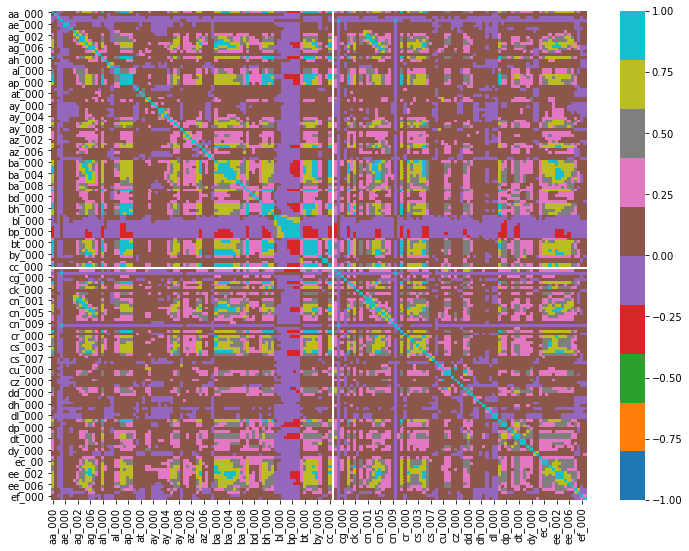

In [39]:
correlation2 = x2.corr()
fig = plt.figure(figsize=(12, 9))
sns.heatmap(correlation2, vmin=-1, vmax=1, cmap=sns.color_palette())
plt.show()

### 4)

In [40]:
print(floor(sqrt(170)))

13


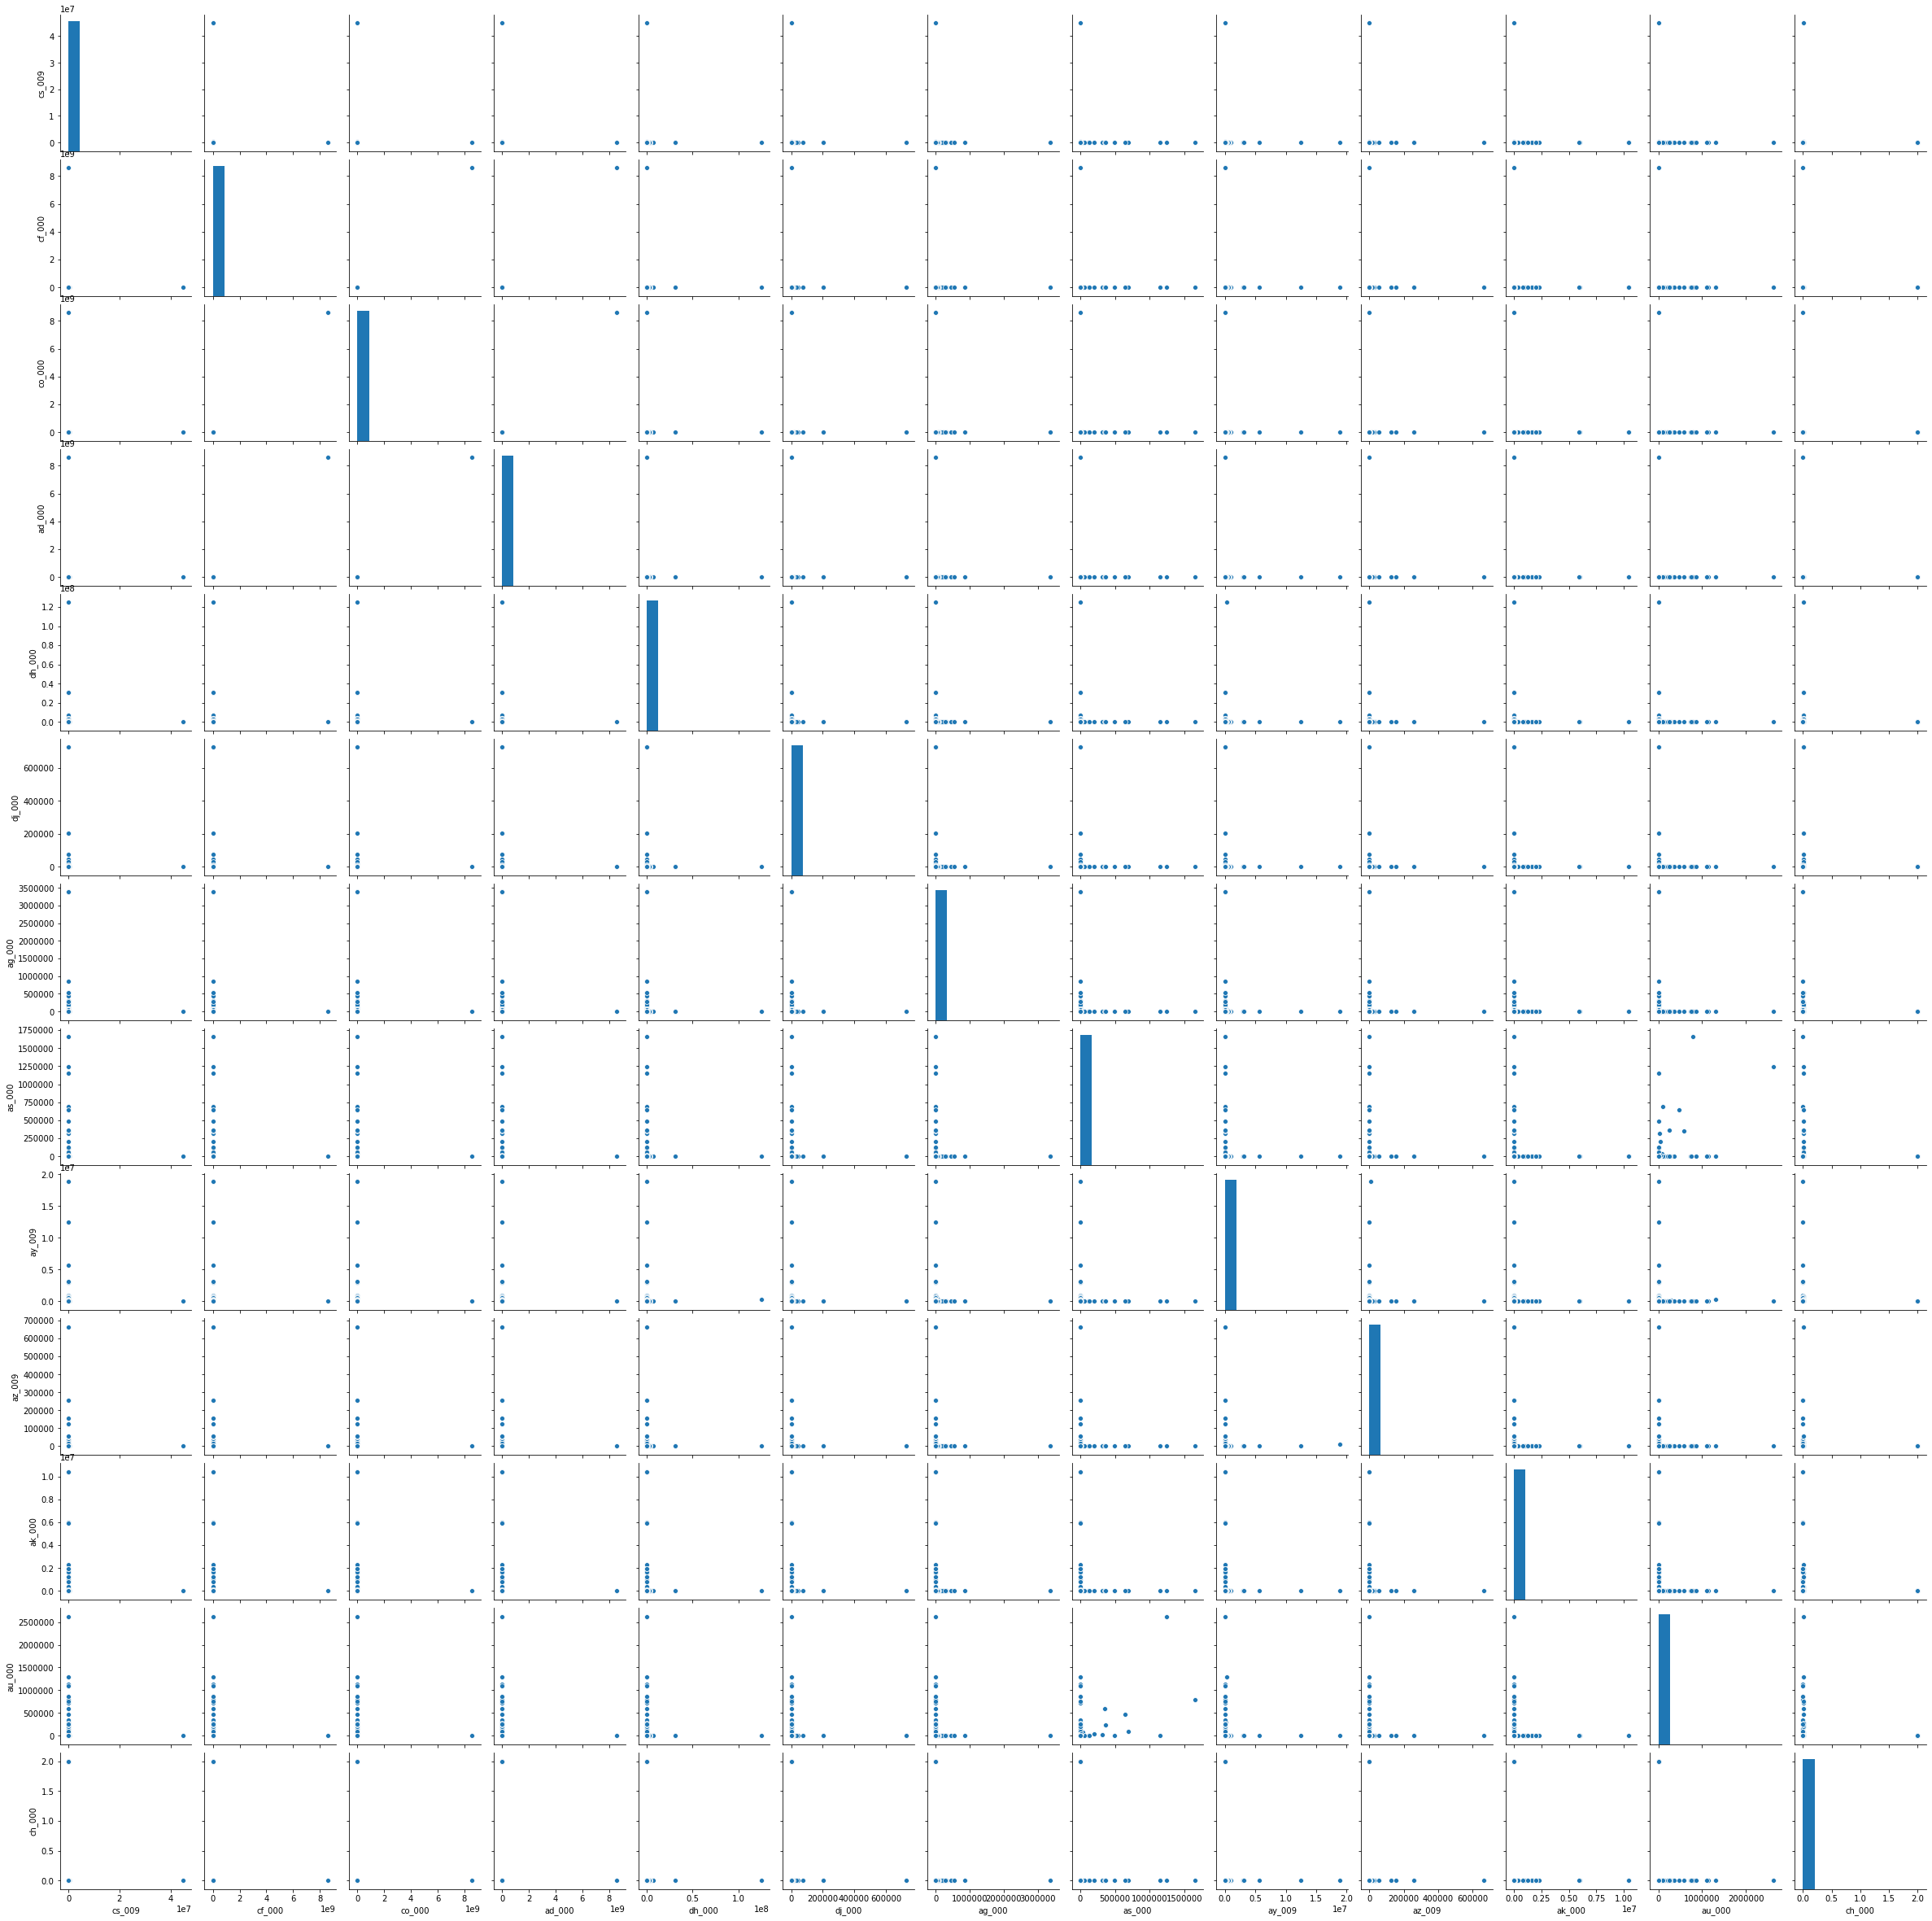

In [41]:
index = np.argsort(-cv2)[:floor(sqrt(170))]
features_highCV = np.array(x2.columns)[index]
data_highCV = x2[features_highCV]

sns.pairplot(data_highCV)
plt.show()

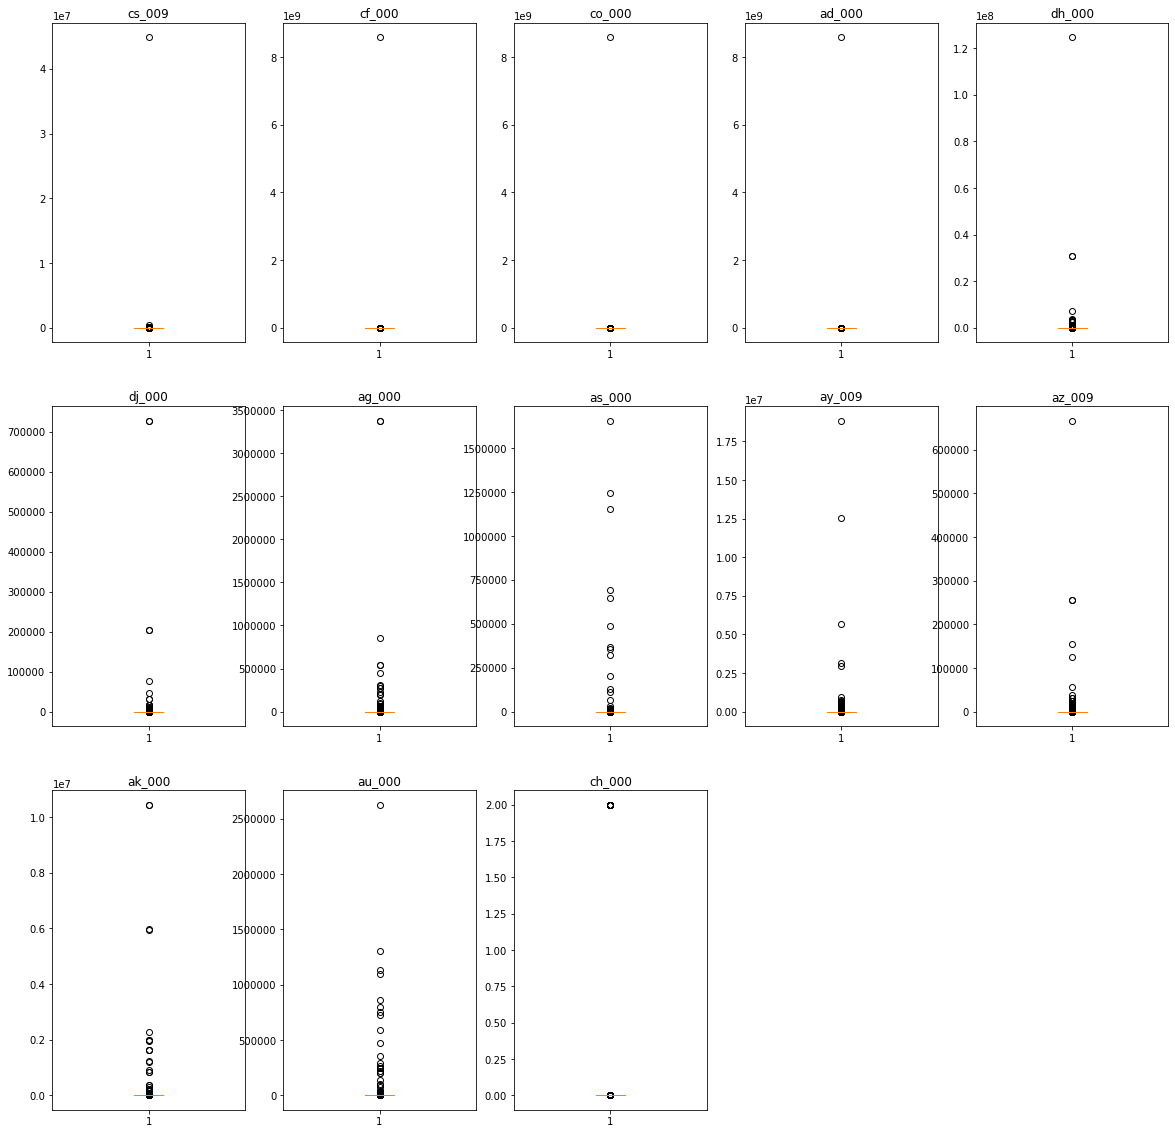

In [42]:
fig, ax = plt.subplots(nrows=3, ncols=5, figsize=(20, 20))

index = 0
for i in range(3):
    for j in range(5):
        if index < 13:
            ax[i, j].boxplot(data_highCV.loc[:, features_highCV[index]])
            ax[i, j].title.set_text(features_highCV[index])
            index = index + 1
        
ax[2, 4].remove()
ax[2, 3].remove()

plt.show()

### 5)

In [43]:
y2tr = np.array([0 if x == 'neg' else 1 for x in y2])
num_pos = np.count_nonzero(y2tr)
num_neg = len(y2tr) - num_pos

print("number of negative data:", num_neg)
print("number of positive data:", num_pos)

number of negative data: 59000
number of positive data: 1000


**yes, it's imbalanced.**

### c)

In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc

In [45]:
filename2 = os.path.join(data_folder,'aps_failure_test_set.csv')
df2_test = pd.read_csv(filename2, skiprows = 20, header = 0).replace('na', np.nan)

missing_columns = df2_test.columns[df2_test.isnull().any()]
impute_mean = SimpleImputer(missing_values = np.nan, strategy = 'mean')

for index in missing_columns:
    value = df2_test[index].to_numpy().reshape(-1, 1)
    impute_mean.fit(value)
    df2_test[index] = impute_mean.transform(value)

missing_columns = df2_test.columns[df2_test.isnull().any()]
print("after imputation: {} columns miss values".format(missing_columns.shape[0]))


after imputation: 0 columns miss values


In [46]:
x2te = df2_test.iloc[:, 1:]
y2_test = df2_test.iloc[:, 0]
y2te = np.array([0 if x == 'neg' else 1 for x in y2_test])

print(x2te.shape, y2te.shape)

(16000, 170) (16000,)


In [47]:
rfClf = RandomForestClassifier(n_estimators=50, oob_score=True).fit(x2, y2tr)
print("For training set:")
print("-------------")
pred_tr = rfClf.predict(x2)
cm_tr = pd.crosstab(y2tr, pred_tr, rownames=['Actual'],
                       colnames=['Predicted'], margins=True)
print("Confusion Matrix(training set):")
print(cm_tr)
print("-------------")
print("Score(training set):", rfClf.score(x2, y2tr))

For training set:
-------------
Confusion Matrix(training set):
Predicted      0    1    All
Actual                      
0          59000    0  59000
1              2  998   1000
All        59002  998  60000
-------------
Score(training set): 0.9999666666666667


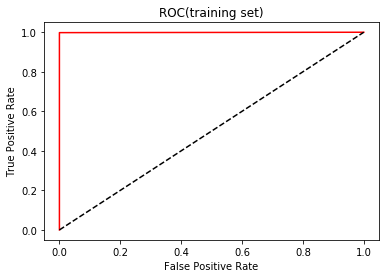

-------------
auc(training set):  0.999


In [48]:
fp, tp, thresholds = roc_curve(y2tr, pred_tr)
area = auc(fp, tp)

plt.plot(fp, tp, color='red')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC(training set)')
plt.show()

print("-------------")
print("auc(training set): ", area)

In [49]:
print("For test set:")
print("-------------")
pred_te = rfClf.predict(x2te)

cm_te = pd.crosstab(y2te, pred_te, rownames=['Actual'],
                       colnames=['Predicted'], margins=True)
print("Confusion Matrix(test set):")
print(cm_te)
print("-------------")
print("Score(test set):", rfClf.score(x2te, y2te))

For test set:
-------------
Confusion Matrix(test set):
Predicted      0    1    All
Actual                      
0          15604   21  15625
1            103  272    375
All        15707  293  16000
-------------
Score(test set): 0.99225


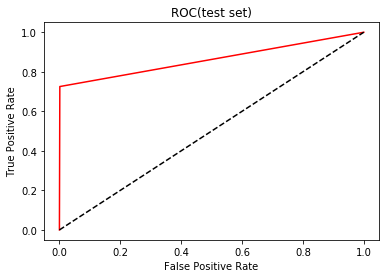

-------------
auc(test set):  0.8619946666666667
OOB Score:  0.9936


In [50]:
fp, tp, thresholds = roc_curve(y2te, pred_te)
area = auc(fp, tp)

plt.plot(fp, tp, color='red')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC(test set)')
plt.show()

print("-------------")
print("auc(test set): ", area)
print("OOB Score: ", rfClf.oob_score_)

**Out of Bag score is higher than test score, so Out of Bag error is smaller than test error.**

### d)

In [51]:
from imblearn.over_sampling import SMOTE

In [52]:
smote = SMOTE()
smote_tr = smote.fit_sample(x2, y2tr)
# smote_te = smote.fit_sample(x2te, y2te)

smote_xtr = pd.DataFrame(smote_tr[0])
smote_ytr = pd.DataFrame(smote_tr[1], columns = ['class'])
# smote_xte = pd.DataFrame(smote_te[0])
# smote_yte = pd.DataFrame(smote_te[1], columns = ['class'])

print("after SMOTE:")
print("training label:\n", smote_ytr['class'].value_counts())
# print("test label:\n", smote_yte['class'].value_counts())

after SMOTE:
training label:
 1    59000
0    59000
Name: class, dtype: int64


In [53]:
rfClf = RandomForestClassifier(n_estimators=50, oob_score=True).fit(smote_xtr, smote_ytr)
print("For training set:")
print("-------------")
pred_tr = rfClf.predict(x2)
cm_tr = pd.crosstab(y2tr, pred_tr, rownames=['Actual'],
                       colnames=['Predicted'], margins=True)
print("Confusion Matrix(training set):")
print(cm_tr)
print("-------------")
print("Score(training set):", rfClf.score(x2, y2tr))

For training set:
-------------
Confusion Matrix(training set):
Predicted      0     1    All
Actual                       
0          59000     0  59000
1              0  1000   1000
All        59000  1000  60000
-------------
Score(training set): 1.0


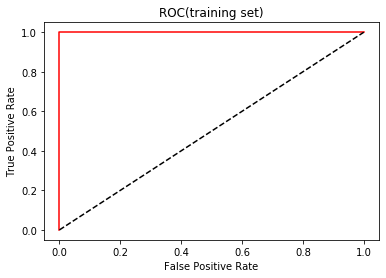

-------------
auc(training set):  1.0


In [54]:
fp, tp, thresholds = roc_curve(y2tr, pred_tr)
area = auc(fp, tp)

plt.plot(fp, tp, color='red')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC(training set)')
plt.show()

print("-------------")
print("auc(training set): ", area)

In [55]:
print("For test set:")
print("-------------")
pred_te = rfClf.predict(x2te)

cm_te = pd.crosstab(y2te, pred_te, rownames=['Actual'],
                       colnames=['Predicted'], margins=True)
print("Confusion Matrix(test set):")
print(cm_te)
print("-------------")
print("Score(test set):", rfClf.score(x2te, y2te))

For test set:
-------------
Confusion Matrix(test set):
Predicted      0    1    All
Actual                      
0          15467  158  15625
1             62  313    375
All        15529  471  16000
-------------
Score(test set): 0.98625


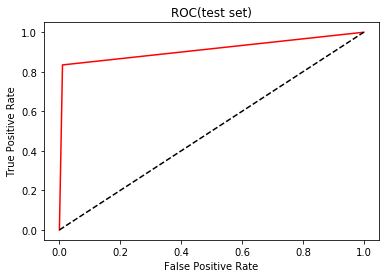

-------------
auc(test set):  0.9122773333333333
OOB Score:  0.9967288135593221


In [56]:
fp, tp, thresholds = roc_curve(y2te, pred_te)
area = auc(fp, tp)

plt.plot(fp, tp, color='red')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC(test set)')
plt.show()

print("-------------")
print("auc(test set): ", area)
print("OOB Score: ", rfClf.oob_score_)

**after class imbalance is addressed, the performance has been improved.**

### e)

In [57]:
import weka.core.jvm as jvm

jvm.start()
# from weka.core.converters import Loader
import weka.core.converters as convert
from weka.classifiers import Classifier
from weka.classifiers import Evaluation
from weka.core.classes import Random

DEBUG:weka.core.jvm:Adding bundled jars
DEBUG:weka.core.jvm:Classpath=['C:\\Users\\14294\\Anaconda3\\envs\\py36\\lib\\site-packages\\javabridge\\jars\\rhino-1.7R4.jar', 'C:\\Users\\14294\\Anaconda3\\envs\\py36\\lib\\site-packages\\javabridge\\jars\\runnablequeue.jar', 'C:\\Users\\14294\\Anaconda3\\envs\\py36\\lib\\site-packages\\javabridge\\jars\\cpython.jar', 'C:\\Users\\14294\\Anaconda3\\envs\\py36\\lib\\site-packages\\weka\\lib\\python-weka-wrapper.jar', 'C:\\Users\\14294\\Anaconda3\\envs\\py36\\lib\\site-packages\\weka\\lib\\weka.jar']
DEBUG:weka.core.jvm:MaxHeapSize=default
DEBUG:weka.core.jvm:Package support disabled


**For traning set:**

In [ ]:
data_tr = pd.concat([y2, x2], axis=1)
data_tr.to_csv("./datatr.csv", index=False)

datatr = convert.load_any_file("./datatr.csv")
datatr.class_is_first()

treeClf = Classifier(classname="weka.classifiers.trees.LMT")
eval_tr = Evaluation(datatr)
eval_tr.crossvalidate_model(classifier=treeClf, data=datatr, 
                                   num_folds=5, rnd=Random(1))
print("train error(5-folds)", eval_tr.percent_incorrect)
print(eval_tr.matrix())
print("-------------")
print("summary:")
print(eval_tr.summary())

In [ ]:
treeClf.build_classifier(datatr)
pred = eval_tr.test_model(treeClf, datatr)

y2tr = np.array([0 if x == 'neg' else 1 for x in y2])


In [ ]:
fp, tp, thresholds = roc_curve(y2tr, pred, pos_label=1)
area = auc(fp, tp)

plt.plot(fp, tp, color='red')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC(training set)')
plt.show()

print("-------------")
print("auc(traning set): ", area)

**For test set:**

In [ ]:
data_te = pd.concat([y2_test, x2te], axis=1)
data_te.to_csv("./datate.csv", index=False)

datate = convert.load_any_file("./datate.csv")
datate.class_is_first()

treeClf = Classifier(classname="weka.classifiers.trees.LMT")
eval_te = Evaluation(datate)
eval_te.crossvalidate_model(classifier=treeClf, data=datate, 
                                   num_folds=5, rnd=Random(1))
print("test error(5-folds)", eval_te.percent_incorrect)
print(eval_te.matrix())
print("-------------")
print("summary:")
print(eval_te.summary())

In [ ]:
treeClf.build_classifier(datate)
pred = eval_te.test_model(treeClf, datate)
y2te = np.array([0 if x == 'neg' else 1 for x in y2_test])


In [ ]:
fp, tp, thresholds = roc_curve(y2te, pred, pos_label=1)
area = auc(fp, tp)

plt.plot(fp, tp, color='red')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC(test set)')
plt.show()

print("-------------")
print("auc(test set): ", area)

### f)

**For traning set:**

In [ ]:
smote = SMOTE()
smote_tr = smote.fit_sample(x2, y2tr)
smote_xtr = pd.DataFrame(smote_tr[0])
smote_ytr = pd.DataFrame(smote_tr[1], columns=['class'])
smote_datatr = pd.concat([smote_ytr, smote_xtr], axis=1)
smote_datatr.to_csv("./datatr_smote.csv", index=False)

datatr_smote = convert.load_any_file("./datatr_smote.csv")
datatr_smote.class_is_first()

treeClf = Classifier(classname="weka.classifiers.trees.LMT")
eval_tr_smote = Evaluation(datatr_smote)
eval_tr_smote.crossvalidate_model(classifier=treeClf, data=datatr_smote, 
                                   num_folds=5, rnd=Random(1))
print("train error(5-folds)", eval_tr_smote.percent_incorrect)
print(eval_tr_smote.matrix())
print("-------------")
print("summary:")
print(eval_tr_smote.summary())

In [ ]:
treeClf.build_classifier(datatr_smote)
pred = eval_tr_smote.test_model(treeClf, datatr_smote)

fp, tp, thresholds = roc_curve(y2tr, pred, pos_label=1)
area = auc(fp, tp)

plt.plot(fp, tp, color='red')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC(training set)')
plt.show()

print("-------------")
print("auc(traning set): ", area)

**For test set:**

In [ ]:
smote = SMOTE()
smote_te = smote.fit_sample(x2te, y2te)
smote_xte = pd.DataFrame(smote_te[0])
smote_yte = pd.DataFrame(smote_te[1], columns=['class'])
smote_datate = pd.concat([smote_yte, smote_xte], axis=1)
smote_datate.to_csv("./datate_smote.csv", index=False)

datate_smote = convert.load_any_file("./datate_smote.csv")
datate_smote.class_is_first()

treeClf = Classifier(classname="weka.classifiers.trees.LMT")
eval_te_smote = Evaluation(datate_smote)
eval_te_smote.crossvalidate_model(classifier=treeClf, data=datate_smote, 
                                   num_folds=5, rnd=Random(1))
print("test error(5-folds)", eval_te_smote.percent_incorrect)
print(eval_te_smote.matrix())
print("-------------")
print("summary:")
print(eval_te_smote.summary())

In [ ]:
treeClf.build_classifier(datate_smote)
pred = eval_te_smote.test_model(treeClf, datate_smote)

fp, tp, thresholds = roc_curve(y2te, pred, pos_label=1)
area = auc(fp, tp)

plt.plot(fp, tp, color='red')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC(test set)')
plt.show()

print("-------------")
print("auc(test set): ", area)

## 3. ISLR 6.8.3

### a)

**iv. Steadily decrease.**

**Actually, it's the lasso. So, if s increases, the model will be more flexible and be more close to normal linear regression. The regularization will be weaker.**

### b)

**ii. Decrease initially, and then eventually start increasing in a U shape.**

**When s increases, the model will be more flexible. The bias will decrease faster than the increase of the variance. But at some point, the bias will decrease slower than the increase of the variance.**

### c)

**iii. Steadily increase.**

**if s increases, the model will be more flexible and be more close to normal linear regression. the variance will increase.**

### d)

**iv. Steadily decrease.**

**if s increases, the model will be more flexible and be more close to normal linear regression. the bias will increase.**

### e)

**v. Remain constant.**

**irreducible error represents the information that X(the features) can't explain. So, it won't be changed.**

## 4. ISLR, 6.8.5

![](https://user-images.githubusercontent.com/18362787/86504936-bdb70b80-bd73-11ea-8697-98c3a377f05d.jpg)

![](https://user-images.githubusercontent.com/18362787/86504937-bdb70b80-bd73-11ea-9cf9-38f1decb2d60.jpg)

## 5. ISLR 8.4.5

**For majority vote, the probabilities of 4 samples are less than 0.5, and 6 samples are bigger than 0.5. So we can predict the X is red.**

**For avarage probability, the average probability of 10 samples is 0.45, so we can predict the X is green.**

## 6. ISLR 9.7.3

![](https://user-images.githubusercontent.com/18362787/86504934-bc85de80-bd73-11ea-9146-6fa7460d4d78.jpg)

![](https://user-images.githubusercontent.com/18362787/86504935-bd1e7500-bd73-11ea-9601-ba555e570599.jpg)